<a href="https://colab.research.google.com/github/pallavmarch/Psychologytoday-therapist-analysis/blob/main/psychologytoday_webscraping_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from google.colab import files


!pip install pgeocode
import pgeocode

pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
df=pd.read_csv("/content/therapists_profiles_data_Texas.csv",encoding='latin-1')
df.shape

(9078, 30)

In [2]:
df[df['Name'] == 'Kathy Lee Siepker']

,Profile URL,Name,Title,Location,State,ZIP Code,Phone,Individual Sessions ($),Couple Sessions ($),Pay By,Insurance,Top Specialties,Expertise,Types of Therapy,Personal Statement,Verified by Psychology Today,In Practice (years),Membership,Certificate,Attended University,Major/Degree,Graduation Year,Qualifications,Endorsement Count,Endorsed By,Age,Participants,Communities,Religion,I also speak
5743,https://www.psychologytoday.com/us/therapists/...,Kathy Lee Siepker,"Clinical Social Work/Therapist,PhD,LCSW,CDP","Flower Mound, TX 75028(214) 692-2076",TX,75028,(214) 692-2076,$150,$150,"ACH Bank transfer, American Express, Discover,...",Aetna | BlueCross and BlueShield | Carelon Beh...,Anxiety | Depression | Dementia,Career Counseling | Coping Skills | Emotional ...,Coaching | Cognitive Behavioral (CBT) | Cultur...,"I am a licensed clinical social worker, therap...",Yes,4,Not Found,National Council of Certified Dementia Practit...,The Ohio State University (PhD); Wash U (MSW),Social Work,2014,Verified byPsychology TodayLicensed by State o...,1,Jamie English - Clinical Social Work/Therapist...,Adults | Elders (65+),Individuals | Couples | Family,Bisexual Allied | Gay Allied | HIV / AIDS Alli...,Not Found,Korean


In [2]:
print(len(df[df['Location'].isnull()]))
df.dropna(subset=['Location'], inplace=True)
df = df.drop_duplicates(subset=['Profile URL'], keep='first')
df.shape

2


(9071, 30)

In [3]:
df['Age'] = df['Age'].replace({'Elders (65+)': 'Elders'})
df['Dementia'] = df['Expertise'].str.lower().str.contains('dementia') | df['Top Specialties'].str.lower().str.contains('dementia')
#df['Autism'] = df['Expertise'].str.lower().str.contains('autism') | df['Top Specialties'].str.lower().str.contains('autism')
#df['Depression'] = df['Expertise'].str.lower().str.contains('depression') | df['Top Specialties'].str.lower().str.contains('depression')
df['Elders (65+)']=df['Age'].str.lower().str.contains('elders')
df['ZIP Code']=df['ZIP Code'].astype(int)

# FUNCTION

In [5]:
def plot_horizontalBar(column):

    plt.style.use("dark_background")
    plt.figure(figsize=(10, 5))

    # Create a horizontal bar chart
    ax = sns.barplot(
        y=column.index,
        x=column.values,
        palette="plasma"
    )

    # Add data labels to each bar
    for index, value in enumerate(column.values):
        ax.text(value + 0.5, index, str(value), color='white', fontsize=9, va='center')

    plt.title("Distribution of Languages Spoken", fontsize=14, color='white')

    plt.xticks(color='white')
    plt.yticks(color='white')

    plt.show()



# DEMENTIA

In [24]:
Dementia=df[df['Dementia']==True]

Dementia=Dementia[['Name','Title', 'Location', 'ZIP Code', 'State',
       'Individual Sessions ($)', 'Couple Sessions ($)',
       'Insurance', 'Top Specialties', 'Expertise', 'Types of Therapy',
       'In Practice (years)', 'Membership', 'Certificate',
       'Major/Degree', 'Graduation Year', 'I also speak', 'Dementia','Elders (65+)']]

Dementia.size

4066

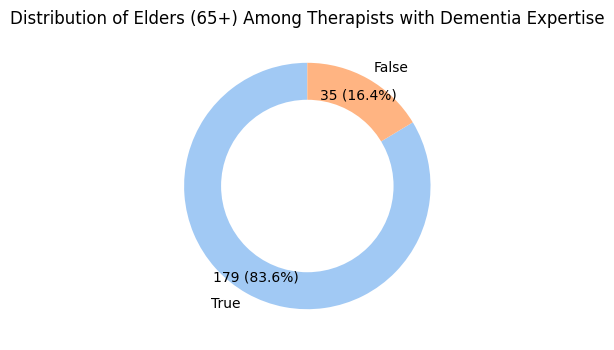

In [8]:
data = df[df['Dementia'] == True]['Elders (65+)'].value_counts()

labels = data.index
sizes = data.values
colors = sns.color_palette("pastel", len(labels))

fig, ax = plt.subplots(figsize=(4, 4))


wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, startangle=90, pctdistance=0.85, colors=colors,
    autopct=lambda p: f'{int(round(p * sum(sizes) / 100))} ({p:.1f}%)',
    textprops={'fontsize': 10}
)


centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

plt.title('Distribution of Elders (65+) Among Therapists with Dementia Expertise')
plt.show()

### Language

In [9]:
Dementia['I also speak'] = Dementia['I also speak'].str.lower()

phrases_to_remove = [
    "se habla espaã±ol | ",
    "conversational ",
    "in spanish and urdu | "
]
pattern = '|'.join(map(re.escape, phrases_to_remove))

Dementia['I also speak'] = Dementia['I also speak'].str.replace(f"{pattern}|\\b(\\w+)\\s*\\|\\s*\\1\\b", r'\1', regex=True)
language_list = Dementia['I also speak'].dropna().str.split('|').explode().str.strip()
language_list=language_list[language_list != 'not found']
language_counts = language_list.value_counts()


<ipython-input-10-62b7ab3b3def>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


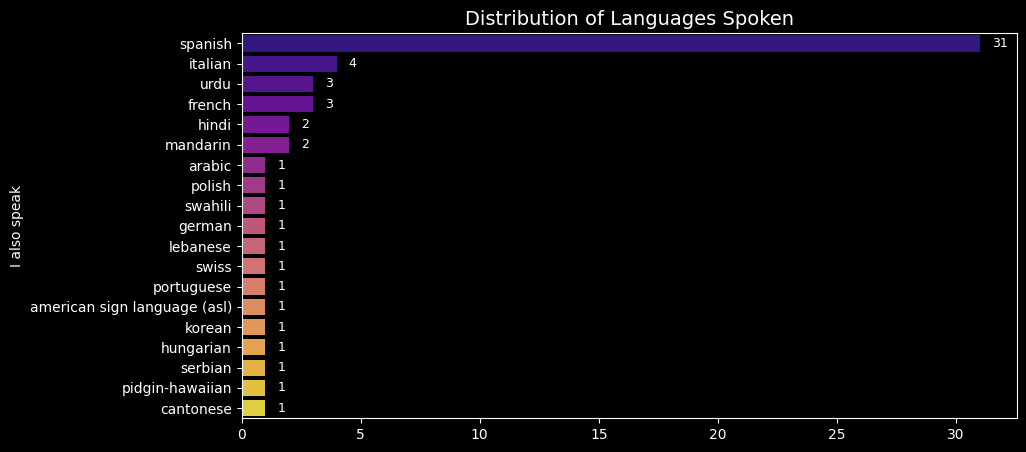

In [11]:
plot_horizontalBar(language_counts)

#Dementia[Dementia['I also speak'].str.lower().str.contains('spanish')]

### Insurance

<ipython-input-5-461a232c47b6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


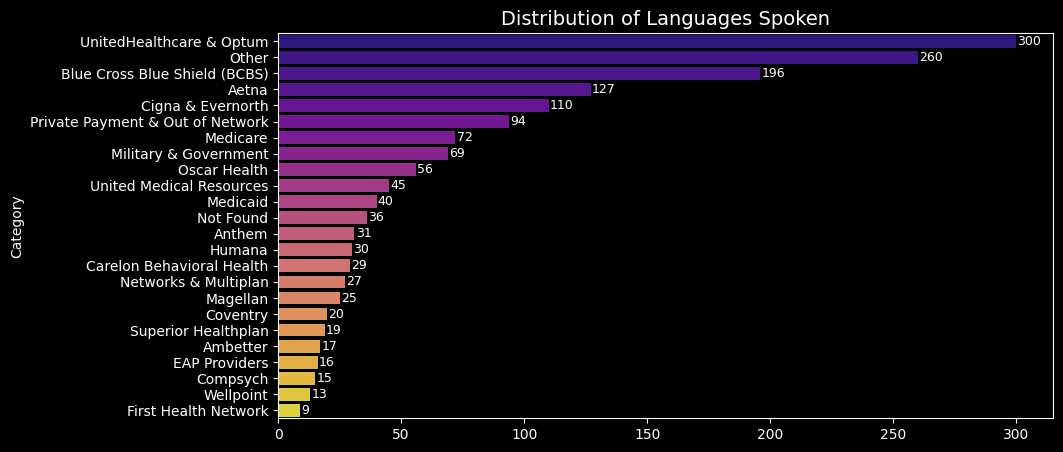

Category                          Insurance                                         
Aetna                             aetna                                                 125
                                  aetna cvshealth                                         1
                                  aetna eap                                               1
Ambetter                          ambetter                                               17
Anthem                            anthem                                                 31
Blue Cross Blue Shield (BCBS)     bcbs blue advantage hmo                                 1
                                  bcbs healthselect hmo                                   1
                                  bcbs ma                                                 1
                                  bcbs ppo                                                1
                                  blue cross                                           

In [16]:
Dementia['Insurance'] = Dementia['Insurance'].str.lower()
Dementia['Insurance'] = Dementia['Insurance'].replace("allied benefit systems- aetna", "allied benefit systems | aetna", regex=False)

insurance_list = Dementia['Insurance'].dropna().str.split('|').explode().str.strip()

insurance_groups = {
    "Aetna": ["aetna", "aetna cvshealth", "aetna eap"],
    "Blue Cross Blue Shield (BCBS)": ["bluecross and blueshield", "blue cross", "blue shield", "horizon blue cross and blue shield",
                                       "blue cross blue shield of ma", "bcbs ppo", "bcbs ma", "bcbs blue advantage hmo", "bcbs healthselect hmo"],
    "Cigna & Evernorth": ["cigna and evernorth", "cigna evernorth & eap"],
    "UnitedHealthcare & Optum": ["unitedhealthcare uhc", "ubh", "optum", "united health/optum", "united healthcare optum & eap"],
    "Humana": ["humana", "humana eap", "humana tricare"],
    "Oscar Health": ["oscar health"],
    "United Medical Resources": ["united medical resources (umr)"],
    # Medicaid Group
    "Medicaid": ["aetna medicaid", "uhc medicaid", "medicaid", "superior medicaid", "chip/chip plus",
                 "bcbs medicaid, sendero", "cenpatico/superior/imhs/star health", "community first",
                 "driscoll health plan", "sendero health plans", "humana - dual", "united health/optum - medicaid"],

    # Medicare Group
    "Medicare": ["medicare", "medicare (railroad)", "aetna medicare", "aetna - medicare", "uhc medicare", "humana medicare",
                 "humana - medicare", "united - medicare advantage", "scan medicare advantage",
                 "bcbs medicare advantage hmo", "bcbs medicare advantage ppo", "s&w medicare advantage", "united health/optum - medicare"],

    "EAP Providers": ["carebridge eap", "continuum eap", "alliance work partners (eap)", "united healthcare optum & eap",
                      "lyra eap", "anthem eap - bank of america", "eap:united health/optum", "eap: united health/optum", "eap:cigna"],
    "Military & Government": ["tricare", "tricare east out of network", "triwest", "champva", "us family health plan", "military onesource","government employees health association (geha)"],
    "Networks & Multiplan": ["multiplan", "multiplan private healthcare systems (phcs)", "multi plan phcs"],
    "First Health Network": ["first health", "first health network", "preferred administrators"],
    "Private Payment & Out of Network": ["out of network", "private payment", "i am an out of network provide"],
    "Anthem":["anthem"],
    "Carelon Behavioral Health": ["carelon behavioral health"],
    "Magellan":"magellan",
    "Coventry":"coventry",
    "Superior Healthplan": ["superior healthplan"],
    "Ambetter": ["ambetter"],
    "Compsych": ["compsych"],
    "Wellpoint": ["wellpoint"],
    "Not Found": ["not found"]
}


category_mapped = []

# Iterate through each insurance provider and assign it to a category
for insurance in insurance_list:
    found = False
    for category, providers in insurance_groups.items():
        if insurance in providers:
            category_mapped.append({"Insurance": insurance, "Category": category})
            found = True
            break
    if not found:
        category_mapped.append({"Insurance": insurance, "Category": "Other"})  # Assign "Other" if no match is found

# Convert the list into a DataFrame
insurance_mapping_df = pd.DataFrame(category_mapped)
inscount=insurance_mapping_df[['Category','Insurance']].value_counts().sort_index()

plot_horizontalBar(insurance_mapping_df['Category'].value_counts())

print(inscount)

### Title

<ipython-input-5-461a232c47b6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


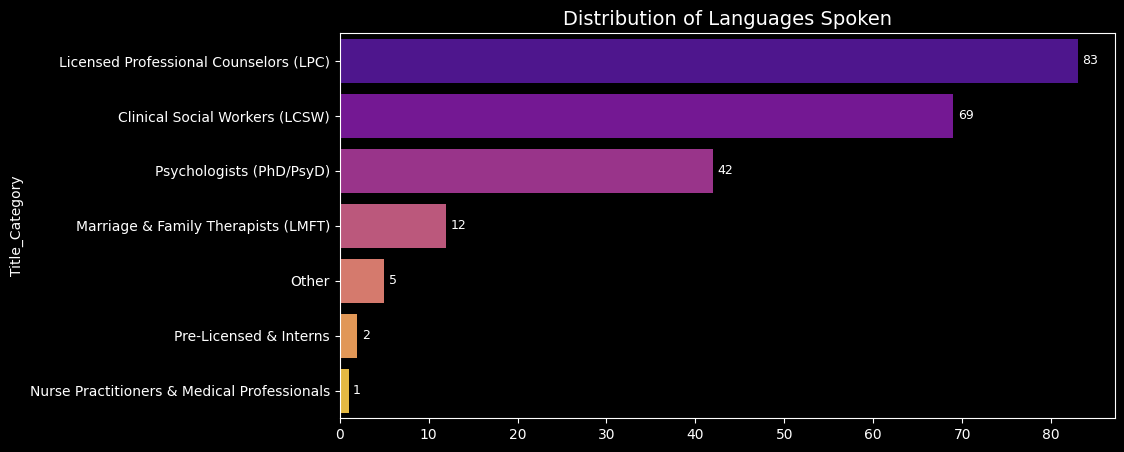

Title_Category                               Title_shorten                            
Clinical Social Workers (LCSW)               clinical social work/therapist               68
                                             master social worker                          1
Licensed Professional Counselors (LPC)       licensed professional counselor              72
                                             licensed professional counselor associate     8
                                             lpc associate                                 2
                                             lpc-associate                                 1
Marriage & Family Therapists (LMFT)          marriage & family therapist                  10
                                             marriage & family therapist associate         2
Nurse Practitioners & Medical Professionals  fnp                                           1
Other                                        counselor                      

In [33]:
Dementia['Title'] = Dementia['Title'].str.lower()
Dementia['Title_shorten'] = Dementia['Title'].str.split('[,(]').str[0]
Dementia.insert(2, 'Title_shorten', Dementia.pop('Title_shorten'))


title_groups = {
    "Licensed Professional Counselors (LPC)": [
        "licensed professional counselor", "licensed professional counselor associate",
        "lpc intern", "lpc-associate", "lpc associate"
    ],
    "Clinical Social Workers (LCSW)": [
        "clinical social work/therapist", "master social worker"
    ],
    "Psychologists (PhD/PsyD)": [
        "psychologist", "psychological associate"
    ],
    "Marriage & Family Therapists (LMFT)": [
        "marriage & family therapist", "marriage & family therapist associate"
    ],
    "Nurse Practitioners & Medical Professionals": [
        "pmhnp(he", "fnp"
    ],
    "Pre-Licensed & Interns": [
        "pre-licensed professional", "lpc intern"
    ],
    "Other": [
        "ms", "counselor"
    ]
}

title_mapping = {title: category for category, titles in title_groups.items() for title in titles}


Dementia['Title_Category'] = Dementia['Title_shorten'].map(title_mapping).fillna("Other")


plot_horizontalBar(Dementia['Title_Category'].value_counts())

print(Dementia[['Title_Category','Title_shorten']].value_counts().sort_index())

### Certifications

<ipython-input-5-461a232c47b6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


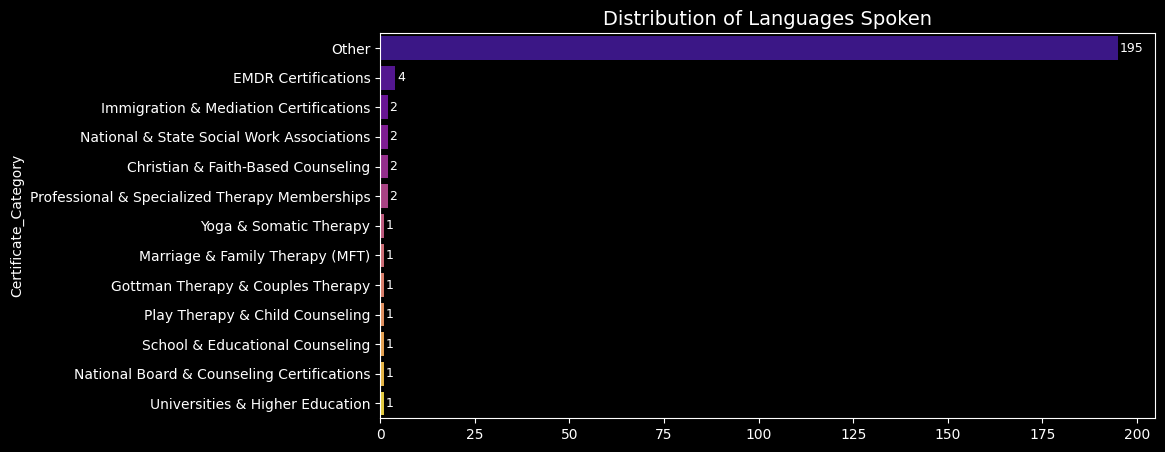

Certificate_Category                            Certificate_clean                                               
Christian & Faith-Based Counseling              american association of christian counselors                          1
                                                christian association for psychological studies                       1
EMDR Certifications                             emdr and brainspotting trained                                        1
                                                emdr therapy basic training                                           1
                                                emdria                                                                1
                                                emdria international association                                      1
Gottman Therapy & Couples Therapy               the gottman institute: gottman method couples therapy level &         1
Immigration & Mediation Certifications         

In [40]:
Dementia['Certificate'] = Dementia['Certificate'].str.lower()
Dementia['Certificate_clean']=Dementia['Certificate'].str.split('/').str[0]
Dementia['Certificate_clean'] = Dementia['Certificate_clean'].str.replace(r'[\d,]', '', regex=True)  # Remove numbers and commas


# Define mapping of certifications to broader categories
certification_groups = {
    "EMDR Certifications": [
        "emdr therapy basic training", "emdria international association", "emdria", "emdr association", "emdr and brainspotting trained"
    ],
    "Yoga & Somatic Therapy": [
        "registered yoga teacher - yoga alliance", "somatic experiencing institute"
    ],
    "Immigration & Mediation Certifications": [
        "immigration evaluation certification", "mediators of texas", "alternative dispute resolution"
    ],
    "Marriage & Family Therapy (MFT)": [
        "aamft", "aamftmft supervisor", "american assoc. for marriage and family therapists"
    ],
    "State & National Board Licenses": [
        "state of texas lcdc", "tx state board of examiners of professional counselor",
        "texas state board of examiners of psychologists", "texas state board of examiners of lpcs approved state supervisor",
        "tx state board of social worker examiners lcsw-s", "state board of health", "texas department of state health services lcdc"
    ],
    "Christian & Faith-Based Counseling": [
        "american association of christian counselors", "evangelical lutheran church in america retired clergy",
        "church of the nazarene ordained minister", "christian association for psychological studies"
    ],
    "National & State Social Work Associations": [
        "nasw", "nasw association", "american board of clinical social work"
    ],
    "Gottman Therapy & Couples Therapy": [
        "gottman level trained therapist", "the gottman institute: gottman method couples therapy level &"
    ],
    "National Board & Counseling Certifications": [
        "national board for certified counselors", "national board of certified counselors",
        "national board for certified counselors inc.", "national certified counselor-nbcc",
        "american counseling association"
    ],
    "Play Therapy & Child Counseling": [
        "hcc-texas association for play therapy", "association for play therapy united states"
    ],
    "School & Educational Counseling": [
        "prairie view a&m university certified school counselor", "university of texas at san antonio- bilingual counseling program",
        "texas education agency tx certified school counselor"
    ],
    "Health & Fitness Specializations": [
        "cpr & aed", "institute for aerobics research physical fitness specialist"
    ],
    "Trauma & Clinical Specializations": [
        "certified clinical trauma professional", "national council of certified dementia practitioners cdp",
        "psychedelic research and training institute"
    ],
    "Universities & Higher Education": [
        "southern methodist university m.s. in counseling", "texas a&m university bs - elementary education",
        "loyola university of chicago master of arts in psychology", "argosy university dallas doctorate in clinical psychology",
        "capella university geriatric psychology", "university of houston graduate college social work m.s.w.",
        "walden university phd. clinical psychology", "east texas baptist univ.", "smu bachelors psychology"
    ],
    "Professional & Specialized Therapy Memberships": [
        "american psychotherapy association", "national register of health service psychologists",
        "professional counselor - supervisor", "prepare-enrich curriculum facilitator",
        "asha certificate of clinical competence", "ccsas"
    ],
    "Substance Abuse & Addiction Counseling": [
        "illinois certification board certified aoda counselor"
    ],
    "Other": [
        "not found", "psypact", "laban", "bciae", "counseling association #", "texaslpc",
        "texas counseling association", "postpartum support international perinatal mental health"
    ]
}


certification_mapping = {title: category for category, titles in certification_groups.items() for title in titles}


Dementia['Certificate_Category'] = Dementia['Certificate_clean'].map(certification_mapping).fillna("Other")


plot_horizontalBar(Dementia['Certificate_Category'].value_counts())

print(Dementia[['Certificate_Category','Certificate_clean']].value_counts().sort_index())


In [39]:
Dementia['Certificate_clean'].value_counts().sort_index()

,count
Certificate_clean,
aamft,1
aamftmft supervisor,1
alternative dispute resolution,1
american assoc. for marriage and family therapists,1
american association of christian counselors,1
american board of clinical social work,1
american counseling association,1
american counseling association,1
american psychotherapy association,1


## Adding county, city

In [ ]:
# Initialize the geocoder for US ZIP codes
nomi = pgeocode.Nominatim('us')

# Function to fetch city and county from ZIP Code
def get_location_info(zip_code):
    location = nomi.query_postal_code(zip_code)
    return pd.Series([location['place_name'], location['county_name']])

df[['City', 'County']] = df['ZIP Code'].astype(str).apply(get_location_info)

In [ ]:
Dementia.to_csv('Dementia.csv')
files.download('Dementia.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### pivot Table and graph

In [ ]:
cols_to_clean = ['Individual Sessions ($)', 'Couple Sessions ($)', 'In Practice (years)']

Dementia[cols_to_clean] = (
    Dementia[cols_to_clean]
    .replace('Not Found', np.nan)
    .apply(lambda x: x.str.replace(r'[$ ]', '', regex=True).astype(float))
   # .astype('Int64')
)


value_counts_list = [
    Dementia[col].value_counts().astype(int).rename_axis(col).reset_index(name='Count')
    for col in cols_to_clean
]
side_by_side = pd.concat(value_counts_list, axis=1)


pivot_table1 = pd.pivot_table(Dementia,
                              values=cols_to_clean,
                              aggfunc=['mean', 'median', 'min', 'max', 'std', 'count', 'nunique', lambda x: x.isnull().sum()],
                              columns=['Dementia'],
                              dropna=True)

pivot_table1 = pivot_table1.applymap(lambda x: int(x) if not pd.isna(x) else x)
pivot_table1.style.background_gradient(cmap='Blues').format("{:.0f}")

<ipython-input-8-268e5f8c66e1>:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table1 = pivot_table1.applymap(lambda x: int(x) if not pd.isna(x) else x)


,mean,median,min,max,std,count,nunique,
Dementia,True,True,True,True,True,True,True,True
Couple Sessions ($),156,150,50,275,49,68,26,93
In Practice (years),14,12,1,41,9,102,34,59
Individual Sessions ($),139,150,25,250,42,123,32,38


However There are rows with blank Individual Sessions ($), couple Sessions ($) and In Practice (years) which are not considered 0 instead of blank

<ipython-input-10-5d5d0895877b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=insurance_counts, y='Insurance Category', x='Count', palette='Blues_r')


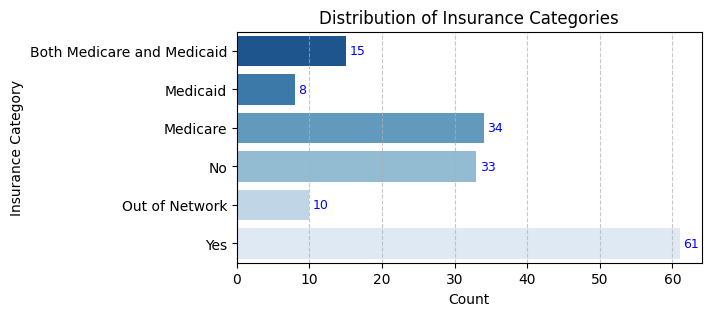

In [ ]:

insurance_counts = Dementia['Insurance_Category'].value_counts().reset_index()
insurance_counts.columns = ['Insurance Category', 'Count']
insurance_counts = insurance_counts.sort_values(by='Insurance Category')

plt.figure(figsize=(6, 3))
ax = sns.barplot(data=insurance_counts, y='Insurance Category', x='Count', palette='Blues_r')

for p in ax.patches:
        ax.annotate(
            format(p.get_width(), '.0f'),
            (p.get_x() + p.get_width() + 0.5, p.get_y() + p.get_height() / 2.),
            ha='left', va='center', fontsize=9, color='blue'
        )

plt.title("Distribution of Insurance Categories")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
Dementia.to_csv('Dementia.csv')